In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [13]:
#Loading and preprocessing of dataset
data = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest,ytest) = data.load_data()

xtrain, xtest = keras.utils.normalize(xtrain, axis = 1), keras.utils.normalize(xtest, axis = 1)


In [14]:
class_names = [
    'Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

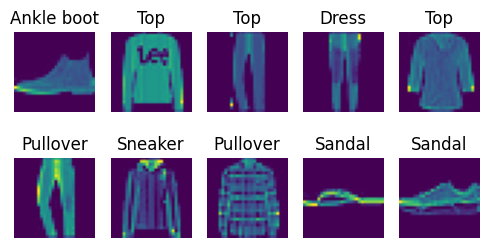

In [15]:
#Displaying a sample of the dataset 

fig, axes = plt.subplots(2, 5, figsize=(6, 3))
for i, j in enumerate(axes.flat):
    j.imshow(xtest[i])
    j.axis('off')
    j.set_title(class_names[ytrain[i]])
plt.show()

In [ ]:
#Defining the Convoluted neural Network using Tensorflow Keras library

from keras import layers, models

#Consists of 2 stacks of multi dimesional Convolution and pooling layers, 1 fully connected dense layer and then output layer.
CNN_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
CNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

In [18]:
#Training and evaluation

CNN_model.fit(xtrain, ytrain, epochs=10)
test_loss, test_acc = CNN_model.evaluate(xtest, ytest)

print("Test accuracy is", int(test_acc * 100) , "%")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7639 - loss: 0.6503
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8723 - loss: 0.3375
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8941 - loss: 0.2832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9032 - loss: 0.2547
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9156 - loss: 0.2247
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9245 - loss: 0.1994
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9324 - loss: 0.1784
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9409 - loss: 0.1587
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9463 - loss: 0.1434
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9527 - loss: 0.1254
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9047 - loss: 0.2983
Test accuracy is 90 %


In [19]:
#For the Confusion matrix
import numpy as np

y_pred_probs = CNN_model.predict(xtest)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = ytest

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


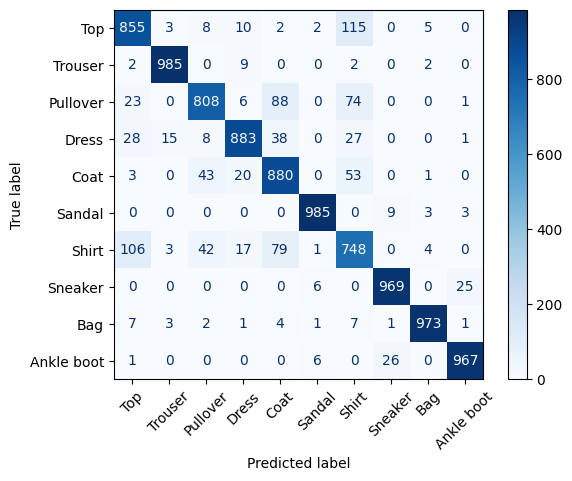

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()

#Notice that Shirts are ofen mistaken for coats or tops as they have similar features.
#Pullovers are sometimes mistaken to be coat/shirt.


In [ ]:
#Saving our model

CNN_model.save("my_cnn_fmnist_model.keras")

In [22]:
#loading it and using without retraining
new_loaded_model = keras.models.load_model("my_cnn_fmnist_model.keras")

loss, acc = new_loaded_model.evaluate(xtest, ytest)
print(f"Restored model accuracy: {int(acc*100)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9047 - loss: 0.2983
Restored model accuracy: 90%


In [23]:
#BONUS: Creating standard Feedforward neural network (FNN) also called Multilayer Perceptron (MLP)


#Contains 2 fully connected dense layers which take 1d flattened input.
FNN_model = models.Sequential()
FNN_model.add(layers.Flatten())
FNN_model.add(layers.Dense(128, activation='relu'))
FNN_model.add(layers.Dense(128, activation='relu'))
FNN_model.add(layers.Dense(10, activation='softmax'))

In [24]:
FNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)
FNN_model.fit(xtrain, ytrain, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7681 - loss: 0.6453
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8652 - loss: 0.3633
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8793 - loss: 0.3238


In [ ]:
FNN_loss, FNN_acc =FNN_model.evaluate(xtest,ytest)

print(f"Accuracy of FNN is {int(FNN_acc*100)}%")

#thus it can be seen CNN is more accurate than FNN for image recognition,
#but fnn is a less time consuming model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8690 - loss: 0.3600
Accuracy of FNN is 86%
